In [1]:
#generic
%matplotlib inline
from __future__ import print_function

import numpy as np
import cupy as cp
import time
import tensorflow as tf
# import quandl 
import matplotlib.pyplot as plt

from yahoo_finance import Share

RuntimeError: CuPy is not correctly installed. Please check your environment, uninstall Chainer and reinstall it with `pip install cupy --no-cache-dir -vvvv`.

In [1]:
1 in [1, 2, 3]

True

In [3]:
def get_data_by_key(key, data):
    data_it = iter(data)
    return_data = []
    flag = True
    for d in data_it:
        if key !="Date":
            return_data.append(float(d[key]))
        else:
            return_data.append(d[key])
        
    return np.array(return_data)

In [4]:
def get_data_by_list_fixed(name_list, start_date, end_date, data_type="Open"):
    share_list = []
    new_name_list = []
    for name in name_list:
        try:
            share_list.append(Share(name))
            new_name_list.append(name)
        except:
            pass
    
    stock_data_list = []
    date = []
    flag = True
    N_data = 0
    fail_name_list = []
    ret_name_list = []
    for idx, share in enumerate(share_list):
        name = new_name_list[idx]
        try:
            hist_data = share.get_historical(start_date=start_date, end_date=end_date)
            stock_data = map(float, get_data_by_key(key=data_type, data=hist_data))
            n_data = len(stock_data)
            if n_data == 0:
                fail_name_list.append(name)
            date.append(get_data_by_key(key='Date', data=hist_data))
            stock_data_list.append(stock_data)
            ret_name_list.append(name)
        except:
            pass
    print ("fail_name_list: ", fail_name_list)
    return np.array(stock_data_list).T, date, ret_name_list

In [5]:
energy = ["PTR", "XOM", "CVX", "RDS-A", "BP", "TOT", "SLB", "KMI", "COP", "CEO", 
          "E", "STO", "OXY", "PBR", "EOG", "APC", "SU", "ENB", "HAL", "WMB"]
financial = ["WFC", "JPM", "HSBC", "BAC", "C", "SAN", "MTU", "RY", "WBK", "TD", "GS", 
             "LYG", "AXP", "AIG", "MS", "ITUB", "BCS", "BBVA"]
healthcare = ["NVS", "JNJ", "PFE", "MRK", "GILD", "SNY", "AMGN", "NVO", "GSK", "UNH",
             "MDT", "BMY", "CELG", "BIIB", "AZN", "LLY", "ABT", "AGN", "VRX", "TEVA",
             "TMO", "SHPG", "REGN"]
buisiness = ["ACN", "LMT", "CNI", "FDX", "DAL", "CSX", "AAL", "CP", "NSC", "NOC", "LUV"]
telecom = ["CHL", "VZ", "T", "VOD", "NTT", "AMX", "CHA", "BT", "CHU", "ORAN", "BCE",
           "CHT", "SKM", "TI", "TU", "S", "TLK", "DUK", "NGG", "D", "SO", "EXC", "KEP",
          "AEP", "SRE", "PCG", "HNP", "PPL", "PEG", "EIX", "ETP", "ED", "ENI", "XEL", "ES", "FE"]
hardware = ["AAPL", "ORCL", "IBM", "INTC", "CSCO", "TSM", "QCOM", "HPQ", "TXN", "EMC",
           "CAJ", "ASML", "ERIC", "SNE", "AVGO", "MU", "GLW", "NXPI", "NOK",
           "AMAT", "WDC", "WIT", "ADI", "STX", "APH"]
software = ["MSFT", "GOOGL", "BIDU", "EBAY", "SAP", "CRM", "YHOO", "VMW",
            "ADBE", "CTSH", "INFY", "INTU", "LNKD", "RHT", "NTES", "CHKP", 
            "CA", "ADSK", "AKAM", "NVDA"]
industrial = ["GE", "V", "MA", "UTX", "MMM", "BA", "UNP", "UPS", "HON", "DHR", "CAT", 
              "ABB", "GD", "ADP", "EMR", "ITW", "ECL", "TEL", "PCAR", "WM"]
manufacturing = ["TM", "HMC", "F", "GM", "JCI", "TSLA", "TTM", "CMI", "DLPH", "MGA",
                "CMI", "DLPH", "MGA", "GPC", "BWA", "HOG", "ALV", "HAR", "LEA", "LKQ", 
                 "WBC", "GT", "FCAU", "NSANY", "NAV"]
consumer = ["PG", "BUD", "KO", "PEP", "UL", "PM", "BTI", "MO", "ABEV", "DEO", "MDLZ",
            "CL", "MON", "MCK", "KMB", "WHR", "DIS", "CMCSA", "FOXA", "TWX", "TWC",
           "DISH", "CBS", "DISCA", "TV", "CHTR", "QVCA", "OMC", "NLSN", 
           "PSO", "SJR", "NFLX"]
diversified = ["BRK-A", "BRK-B", "UTX", "BC", "RTN", "OLN", "ITT", "MSBHY", "KWHIY", 
               "ABB", "IEP", "GE"]
retailing = ["WMT", "AMZN", "HD", "MCD", "NKE", "SBUX", "CVS", "WBA", "PCLN", "COST", 
            "TGT", "TJX", "LVS", "YUM", "CCL", "LUX", "DG", "M", "AZO", "ROST", "CMG", "GPS", 
            "DLTR", "RCL", "KSS", "HOT", "JWN"]

input_list = energy + financial + healthcare + buisiness + telecom\
+ hardware + software + industrial + manufacturing + consumer + diversified + retailing
print (len(input_list))

269


In [6]:
print ("Started!!")

st = time.time()
start_date="2014-04-01"
end_date="2016-04-01"
input_data, date, input_list = get_data_by_list_fixed(input_list, start_date=start_date, end_date=end_date) 
elapsed = time.time() - st
print ("time for getting training_data:", elapsed)

Started!!
fail_name_list:  []
time for getting training_data: 981.886349201


In [7]:
print (input_data.shape)

(505, 248)


In [9]:
len(input_list)

248

In [10]:
input_list[0]

'PTR'

### convert date label for plot

In [16]:
import datetime

def convert_time_format(date):
    date_tilde = date.split("-")
    date_tilde = map(int, date_tilde)
    return datetime.datetime(*date_tilde)

In [19]:
date_each = date[0]

In [20]:
date_label=[]
for i in xrange(len(date_each)):
    date_label.append(convert_time_format(date_each[i]))

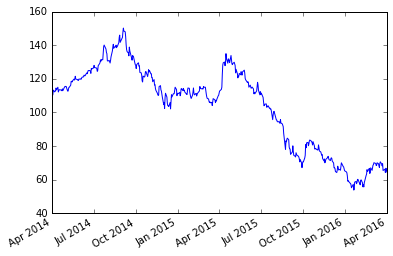

In [22]:
plt.plot(date_label, input_data[:, 0])
plt.gcf().autofmt_xdate()

If we take all of actions into consideration, action space has huge dimention. So, I will just think about short, call, and hold for 'PTR' as all actions.

In [44]:
class DQNMLP(object):
    def __init__(self, layers, activation=tf.sigmoid,  gam=0.95, is_initialize=True):
        """initialized approximate value function
        
        Args:
            layers(list): list of the number of nodes in each layer
            gam (float): decay rate
            is_intialized(optional) (bool): if True, the graph will be initialized
        """
        print ("building model....")
        self.layers = layers
        self.activation = activation
        
        # intialize graph to avoid conflications
        if is_initialize is True:
            sess  = tf.InteractiveSession()
            tf.reset_default_graph()
            sess.close()
            
        self._action = tf.placeholder(tf.int32, name= "action")
        self._cash = tf.placeholder(tf.float32, name="cash")
        self._stock = tf.placeholder(tf.int32, name="stock")
        self._price = tf.placeholder(tf.float32, [layers[0] - 3], name="price")
        
        # change format for training
        action_tilde = tf.to_float(self._action, name="action_tilde")
        stock_tilde = tf.to_float(self._stock, name="stock_tilde")
        price_tilde = tf.unpack(self._price)
        input_list = [action_tilde] + [stock_tilde] + [self._cash] + price_tilde
        input_tensor= tf.pack(input_list)
        
        self._input = tf.reshape(input_tensor, shape=[1, layers[0]], name="input")
        self._target = tf.placeholder(tf.float32, [1, 1], name="target")
        
        # normalization for input
        shape = [self.layers[0]]
        gamma = tf.Variable(tf.constant(1.0, shape=shape), name="gamma")
        beta = tf.Variable(tf.constant(0.0, shape=shape), name="beta")
        self.normalized_input = self.batch_normalization(self._input, shape, gamma, beta)
                
        # keep parameters for pretraining
        self.gamma_list = []
        self.beta_list = []
        self.gamma_list.append(gamma)
        self.beta_list.append(beta)
        
        # parameters
        self.W_list = []
        self.b_list = []
        
        # the name of variable scope will be layer0, layer1, ...
        x = self.normalized_input
        for i_layer in xrange(len(self.layers) - 1):
            with tf.variable_scope("layer%d" % i_layer):
                n_in = self.layers[i_layer]
                n_out = self.layers[i_layer + 1]
                W = self.weight_variable([n_in, n_out])
                b = self.bias_variable([n_out])
                
                # keep parameters for pretraining
                self.W_list.append(W)
                self.b_list.append(b)
                
                z = tf.matmul(x, W) + b
                
            # we will not apply activation function for the last layer
            if i_layer == len(self.layers) - 2:
                self._Q = z
            else:
                shape = [self.layers[i_layer + 1]]
                gamma = tf.Variable(tf.constant(1.0, shape=shape), name="gamma")
                beta = tf.Variable(tf.constant(0.0, shape=shape), name="beta")
                
                # keep parameters for pretraining
                self.gamma_list.append(gamma)
                self.beta_list.append(beta)
                
                normalized_z = self.batch_normalization(z, shape, gamma, beta)
                x = self.activation(normalized_z)
        
        # training graph
        self._learning_rate = tf.placeholder(tf.float32, shape=[], name="learning_rate")
        self.loss = tf.reduce_mean(tf.square(self._Q - self._target))
        # fixate on using this optimizer, otherwize, otherwise endup using unecessary graph nose
        self.optimizer = tf.train.AdamOptimizer(self._learning_rate, name="Optimizer")
        self.train = self.optimizer.minimize(self.loss)   
        
    def weight_variable(self, shape):
        initial = tf.truncated_normal(shape, stddev=1.0)
        return tf.Variable(initial, name="weight")
        
    def bias_variable(self, shape):
        initial = tf.constant(0.0, shape=shape)
        return tf.Variable(initial, name="bias")
        
    def batch_normalization(self, input, shape, gamma=None, beta=None):
        # input should be hidden_dim
        eps = 1e-5
        if gamma is None:
            gamma = tf.Variable(tf.constant(1.0, shape=shape))
        if beta is None:
            beta = tf.Variable(tf.constant(0.0, shape=shape))
        mean, variance = tf.nn.moments(input, [0])
        return gamma * (input - mean) / tf.sqrt(variance + eps) + beta
    
    def eps_greedy(self, eps, cash, stock, price, sess):
        """Return action chosen by greedy algorithm"""
        u = np.random.uniform()
        actions = [-1, 0, 1]
        if u < 1 - eps:
            q_list = []
            for a in actions:
                q = self._Q.eval(session=sess, 
                                 feed_dict={self._action: a, 
                                            self._cash: cash,
                                            self._stock: stock,
                                            self._price: price})
                q_list.append(q)
            action = actions[np.argmax(q_list)]
        else:
            action = actions[np.random.randint(0, 3)]
        
        return action
                
    
    def training(self, whole_stock, trade_stock, n_memory=20, eps=0.1, init_cash=10000, init_stock=0, gam=0.95, learning_rate=1e-4, n_epochs=100):
        """training DQN which consider three actions; sell, buy, hold
              money and n_stock are considered as state variable
        
        Args:
            data (list): stock price for one company
            n_memory (int): the number of data that is used for Experience Replay
            eps (float): the epsilon of greedy epsilon used for behavior policy
            init_cash (float): initial available cash
            init_stock (int): the number of stock data 
        """
        init_op = tf.initialize_all_variables()
        saver = tf.train.Saver()
        T = len(whole_stock)
        print_freq = int(n_epochs / 10)
        
        print ("training....")
        st = time.time()
        with tf.Session() as sess:
            sess.run(init_op)
            value_list  = []
            for epoch in xrange(n_epochs):
                lr = learning_rate
                cash = init_cash
                stock = init_stock
                price = whole_stock[0]
                # memory pool used for Experience Replay
                # length should be less than n_memory
                memory = []
                for t in xrange(T - 1):
                    # select action with e-greedy
                    # but:+1, hold: 0, sell -1
                    action = self.eps_greedy(eps, cash, stock, price, sess)
                    new_cash = cash - trade_stock[t] * action
                    new_stock = stock + action
                    new_price = whole_stock[t + 1]
                    # add memory pools whose capacity is up to n_memory
                    reward = new_stock * (trade_stock[t + 1] - trade_stock[t])
                    transition = [cash, stock, price, action, reward, new_cash, new_stock, new_price]
                    if len(memory) == n_memory:
                        del memory[0]
                    memory.append(transition)
                    cash = new_cash
                    stock = new_stock
                    price = new_price
                    
                    # select transition from pool
                    idx = np.random.randint(0, len(memory))
                    trans = memory[idx]
                    c = trans[0]
                    s = trans[1]
                    p = trans[2]
                    a = trans[3]
                    r = trans[4]
                    new_c = trans[5]
                    new_s = trans[6]
                    new_p = trans[7]
                    new_a = self.eps_greedy(eps, new_c, new_s, new_p, sess)
                    q = self._Q.eval(session=sess, 
                                     feed_dict={self._action: new_a, 
                                                self._cash: new_c,
                                                self._stock: new_s,
                                                self._price: new_p})
                    target = q + r
                    sess.run(self.train, 
                             feed_dict={self._action: a, 
                                        self._cash: c,
                                        self._stock: s,
                                        self._price: p,
                                        self._target: target,
                                        self._learning_rate:lr})  
                    
                value = cash + trade_stock[-1] * stock
                value_list.append(value)
                if epoch % print_freq == 0:
                    print ("epoch: %d, final value:%f, stock:%d, cash:%f" % (epoch, value, stock, cash))
                    print ("elapsed time:", time.time() - st)
           
            # save_path = saver.save(sess, "/jupyter/tomoaki/DQN/trained_params.ckpt")
            save_path = saver.save(sess, "/home/tomoaki/alpaca/notebooks//DQN/trained_params.ckpt")
            print("Model saved in file: %s" % save_path)
           
        return value_list

In [45]:
test_idx = date_label.index(datetime.datetime(2015, 4, 1, 0, 0))
trade_data = input_data[:, 0]
n_in = len(input_data[0]) + 3
n_hid1 = int(n_in * 0.3)
n_hid2 = int(n_hid1 * 0.3)
n_out = 1
layers = [n_in, n_hid1, n_hid2, n_out]
train = input_data[:test_idx]
test = input_data[test_idx:]
date_test = date_label[test_idx:]

dqn = DQNMLP(layers=layers)
print ("start!")
st = time.time()
value = dqn.training(whole_stock=input_data, trade_stock=trade_data, n_epochs=100, init_cash=10000)
elapsed = time.time() - st
print ("computation time:", elapsed)

building model....
start!
training....
epoch: 0, final value:7350.261355, stock:-457, cash:57679.669984
elapsed time: 8.93725204468
epoch: 10, final value:7250.321320, stock:-452, cash:57029.079964
elapsed time: 96.6960039139
epoch: 20, final value:7097.621313, stock:-461, cash:57867.549930
elapsed time: 184.169920921
epoch: 30, final value:6624.991313, stock:-453, cash:56513.879954
elapsed time: 273.026759863
epoch: 40, final value:6963.131376, stock:-460, cash:57622.929996
elapsed time: 361.735897064
epoch: 50, final value:7325.141312, stock:-447, cash:56553.249971
elapsed time: 450.004987001
epoch: 60, final value:7048.211354, stock:-458, cash:57487.749980
elapsed time: 539.434099913
epoch: 70, final value:7511.851236, stock:-440, cash:55969.049916
elapsed time: 627.813276052


KeyboardInterrupt: 

As a comparison, we do the same thing using CPU

In [50]:
class DQNMLP_cpu(object):
    def __init__(self, layers, activation=tf.sigmoid,  gam=0.95, is_initialize=True):
        """initialized approximate value function
        
        Args:
            layers(list): list of the number of nodes in each layer
            gam (float): decay rate
            is_intialized(optional) (bool): if True, the graph will be initialized
        """
        print ("building model....")
        self.layers = layers
        self.activation = activation
        
        # intialize graph to avoid conflications
        if is_initialize is True:
            sess  = tf.InteractiveSession()
            tf.reset_default_graph()
            sess.close()
        with tf.device('/cpu:0'):   
            self._action = tf.placeholder(tf.int32, name= "action")
            self._cash = tf.placeholder(tf.float32, name="cash")
            self._stock = tf.placeholder(tf.int32, name="stock")
            self._price = tf.placeholder(tf.float32, [layers[0] - 3], name="price")
        
            # change format for training
            action_tilde = tf.to_float(self._action, name="action_tilde")
            stock_tilde = tf.to_float(self._stock, name="stock_tilde")
            price_tilde = tf.unpack(self._price)
            input_list = [action_tilde] + [stock_tilde] + [self._cash] + price_tilde
            input_tensor= tf.pack(input_list)
        
            self._input = tf.reshape(input_tensor, shape=[1, layers[0]], name="input")
            self._target = tf.placeholder(tf.float32, [1, 1], name="target")
        
            # normalization for input
            shape = [self.layers[0]]
            gamma = tf.Variable(tf.constant(1.0, shape=shape), name="gamma")
            beta = tf.Variable(tf.constant(0.0, shape=shape), name="beta")
            self.normalized_input = self.batch_normalization(self._input, shape, gamma, beta)
                
            # keep parameters for pretraining
            self.gamma_list = []
            self.beta_list = []
            self.gamma_list.append(gamma)
            self.beta_list.append(beta)
        
            # parameters
            self.W_list = []
            self.b_list = []
        
            # the name of variable scope will be layer0, layer1, ...
            x = self.normalized_input
            for i_layer in xrange(len(self.layers) - 1):
                with tf.variable_scope("layer%d" % i_layer):
                    n_in = self.layers[i_layer]
                    n_out = self.layers[i_layer + 1]
                    W = self.weight_variable([n_in, n_out])
                    b = self.bias_variable([n_out])
                
                    # keep parameters for pretraining
                    self.W_list.append(W)
                    self.b_list.append(b)
                
                    z = tf.matmul(x, W) + b
                
                # we will not apply activation function for the last layer
                if i_layer == len(self.layers) - 2:
                    self._Q = z
                else:
                    shape = [self.layers[i_layer + 1]]
                    gamma = tf.Variable(tf.constant(1.0, shape=shape), name="gamma")
                    beta = tf.Variable(tf.constant(0.0, shape=shape), name="beta")
                
                    # keep parameters for pretraining
                    self.gamma_list.append(gamma)
                    self.beta_list.append(beta)
                
                    normalized_z = self.batch_normalization(z, shape, gamma, beta)
                    x = self.activation(normalized_z)
        
            # training graph
            self._learning_rate = tf.placeholder(tf.float32, shape=[], name="learning_rate")
            self.loss = tf.reduce_mean(tf.square(self._Q - self._target))
            # fixate on using this optimizer, otherwize, otherwise endup using unecessary graph nose
            self.optimizer = tf.train.AdamOptimizer(self._learning_rate, name="Optimizer")
            self.train = self.optimizer.minimize(self.loss)   
        
    def weight_variable(self, shape):
        initial = tf.truncated_normal(shape, stddev=1.0)
        return tf.Variable(initial, name="weight")
        
    def bias_variable(self, shape):
        initial = tf.constant(0.0, shape=shape)
        return tf.Variable(initial, name="bias")
        
    def batch_normalization(self, input, shape, gamma=None, beta=None):
        # input should be hidden_dim
        eps = 1e-5
        if gamma is None:
            gamma = tf.Variable(tf.constant(1.0, shape=shape))
        if beta is None:
            beta = tf.Variable(tf.constant(0.0, shape=shape))
        mean, variance = tf.nn.moments(input, [0])
        return gamma * (input - mean) / tf.sqrt(variance + eps) + beta
    
    def eps_greedy(self, eps, cash, stock, price, sess):
        """Return action chosen by greedy algorithm"""
        u = np.random.uniform()
        actions = [-1, 0, 1]
        if u < 1 - eps:
            q_list = []
            for a in actions:
                q = self._Q.eval(session=sess, 
                                 feed_dict={self._action: a, 
                                            self._cash: cash,
                                            self._stock: stock,
                                            self._price: price})
                q_list.append(q)
            action = actions[np.argmax(q_list)]
        else:
            action = actions[np.random.randint(0, 3)]
        
        return action
                
    
    def training(self, whole_stock, trade_stock, n_memory=20, eps=0.1, init_cash=10000, init_stock=0, gam=0.95, learning_rate=1e-4, n_epochs=100):
        """training DQN which consider three actions; sell, buy, hold
              money and n_stock are considered as state variable
        
        Args:
            data (list): stock price for one company
            n_memory (int): the number of data that is used for Experience Replay
            eps (float): the epsilon of greedy epsilon used for behavior policy
            init_cash (float): initial available cash
            init_stock (int): the number of stock data 
        """
        init_op = tf.initialize_all_variables()
        saver = tf.train.Saver()
        T = len(whole_stock)
        print_freq = int(n_epochs / 10)
        
        print ("training....")
        st = time.time()
        with tf.device('/cpu:0'):
            with tf.Session() as sess:
                sess.run(init_op)
                value_list  = []
                for epoch in xrange(n_epochs):
                    lr = learning_rate
                    cash = init_cash
                    stock = init_stock
                    price = whole_stock[0]
                    # memory pool used for Experience Replay
                    # length should be less than n_memory
                    memory = []
                    for t in xrange(T - 1):
                        # select action with e-greedy
                        # but:+1, hold: 0, sell -1
                        action = self.eps_greedy(eps, cash, stock, price, sess)
                        new_cash = cash - trade_stock[t] * action
                        new_stock = stock + action
                        new_price = whole_stock[t + 1]
                        # add memory pools whose capacity is up to n_memory
                        reward = new_stock * (trade_stock[t + 1] - trade_stock[t])
                        transition = [cash, stock, price, action, reward, new_cash, new_stock, new_price]
                        if len(memory) == n_memory:
                            del memory[0]
                        memory.append(transition)
                        cash = new_cash
                        stock = new_stock
                        price = new_price
                    
                        # select transition from pool
                        idx = np.random.randint(0, len(memory))
                        trans = memory[idx]
                        c = trans[0]
                        s = trans[1]
                        p = trans[2]
                        a = trans[3]
                        r = trans[4]
                        new_c = trans[5]
                        new_s = trans[6]
                        new_p = trans[7]
                        new_a = self.eps_greedy(eps, new_c, new_s, new_p, sess)
                        q = self._Q.eval(session=sess, 
                                         feed_dict={self._action: new_a, 
                                                self._cash: new_c,
                                                self._stock: new_s,
                                                self._price: new_p})
                        target = q + r
                        sess.run(self.train, 
                             feed_dict={self._action: a, 
                                        self._cash: c,
                                        self._stock: s,
                                        self._price: p,
                                        self._target: target,
                                        self._learning_rate:lr})  
                    
                    value = cash + trade_stock[-1] * stock
                    value_list.append(value)
                    if epoch % print_freq == 0:
                        print ("epoch: %d, final value:%f, stock:%d, cash:%f" % (epoch, value, stock, cash))
                        print ("elapsed time:", time.time() - st)
           
                # save_path = saver.save(sess, "/jupyter/tomoaki/DQN/trained_params.ckpt")
                save_path = saver.save(sess, "/home/tomoaki/alpaca/notebooks//DQN/trained_params.ckpt")
                print("Model saved in file: %s" % save_path)
           
        return value_list

In [51]:
dqn = DQNMLP_cpu(layers=layers)
print ("start!")
st = time.time()
value = dqn.training(whole_stock=input_data, trade_stock=trade_data, n_epochs=100, init_cash=10000)
elapsed = time.time() - st
print ("computation time:", elapsed)
    

building model....
start!
training....
epoch: 0, final value:6942.711348, stock:-466, cash:58263.289950
elapsed time: 1.95241999626
epoch: 10, final value:6709.331311, stock:-450, cash:56267.829961
elapsed time: 19.1964230537
epoch: 20, final value:7127.261329, stock:-449, cash:56575.629982
elapsed time: 36.1533370018
epoch: 30, final value:7080.571365, stock:-466, cash:58401.149967
elapsed time: 52.9724709988
epoch: 40, final value:6883.601288, stock:-449, cash:56331.969941
elapsed time: 69.6491761208
epoch: 50, final value:6733.851281, stock:-453, cash:56622.739922
elapsed time: 87.5504851341
epoch: 60, final value:6890.161378, stock:-469, cash:58541.129971
elapsed time: 105.014996052
epoch: 70, final value:7060.701334, stock:-457, cash:57390.109963
elapsed time: 122.497781992
epoch: 80, final value:6812.721339, stock:-461, cash:57582.649956
elapsed time: 139.807360172
epoch: 90, final value:6942.511306, stock:-453, cash:56831.399947
elapsed time: 157.288625002
Model saved in file: /

hmmm......, something strange. CPU is way faster

According to this blog http://studylog.hateblo.jp/entry/2015/10/01/08362, we have to use "cupy" to make progmrams run faster.

# use cupy

In [ ]:
class DQNMLP(object):
    def __init__(self, layers, activation=tf.sigmoid,  gam=0.95, is_initialize=True):
        """initialized approximate value function
        
        Args:
            layers(list): list of the number of nodes in each layer
            gam (float): decay rate
            is_intialized(optional) (bool): if True, the graph will be initialized
        """
        print ("building model....")
        self.layers = layers
        self.activation = activation
        
        # intialize graph to avoid conflications
        if is_initialize is True:
            sess  = tf.InteractiveSession()
            tf.reset_default_graph()
            sess.close()
            
        self._action = tf.placeholder(tf.int32, name= "action")
        self._cash = tf.placeholder(tf.float32, name="cash")
        self._stock = tf.placeholder(tf.int32, name="stock")
        self._price = tf.placeholder(tf.float32, [layers[0] - 3], name="price")
        
        # change format for training
        action_tilde = tf.to_float(self._action, name="action_tilde")
        stock_tilde = tf.to_float(self._stock, name="stock_tilde")
        price_tilde = tf.unpack(self._price)
        input_list = [action_tilde] + [stock_tilde] + [self._cash] + price_tilde
        input_tensor= tf.pack(input_list)
        
        self._input = tf.reshape(input_tensor, shape=[1, layers[0]], name="input")
        self._target = tf.placeholder(tf.float32, [1, 1], name="target")
        
        # normalization for input
        shape = [self.layers[0]]
        gamma = tf.Variable(tf.constant(1.0, shape=shape), name="gamma")
        beta = tf.Variable(tf.constant(0.0, shape=shape), name="beta")
        self.normalized_input = self.batch_normalization(self._input, shape, gamma, beta)
                
        # keep parameters for pretraining
        self.gamma_list = []
        self.beta_list = []
        self.gamma_list.append(gamma)
        self.beta_list.append(beta)
        
        # parameters
        self.W_list = []
        self.b_list = []
        
        # the name of variable scope will be layer0, layer1, ...
        x = self.normalized_input
        for i_layer in xrange(len(self.layers) - 1):
            with tf.variable_scope("layer%d" % i_layer):
                n_in = self.layers[i_layer]
                n_out = self.layers[i_layer + 1]
                W = self.weight_variable([n_in, n_out])
                b = self.bias_variable([n_out])
                
                # keep parameters for pretraining
                self.W_list.append(W)
                self.b_list.append(b)
                
                z = tf.matmul(x, W) + b
                
            # we will not apply activation function for the last layer
            if i_layer == len(self.layers) - 2:
                self._Q = z
            else:
                shape = [self.layers[i_layer + 1]]
                gamma = tf.Variable(tf.constant(1.0, shape=shape), name="gamma")
                beta = tf.Variable(tf.constant(0.0, shape=shape), name="beta")
                
                # keep parameters for pretraining
                self.gamma_list.append(gamma)
                self.beta_list.append(beta)
                
                normalized_z = self.batch_normalization(z, shape, gamma, beta)
                x = self.activation(normalized_z)
        
        # training graph
        self._learning_rate = tf.placeholder(tf.float32, shape=[], name="learning_rate")
        self.loss = tf.reduce_mean(tf.square(self._Q - self._target))
        # fixate on using this optimizer, otherwize, otherwise endup using unecessary graph nose
        self.optimizer = tf.train.AdamOptimizer(self._learning_rate, name="Optimizer")
        self.train = self.optimizer.minimize(self.loss)   
        
    def weight_variable(self, shape):
        initial = tf.truncated_normal(shape, stddev=1.0)
        return tf.Variable(initial, name="weight")
        
    def bias_variable(self, shape):
        initial = tf.constant(0.0, shape=shape)
        return tf.Variable(initial, name="bias")
        
    def batch_normalization(self, input, shape, gamma=None, beta=None):
        # input should be hidden_dim
        eps = 1e-5
        if gamma is None:
            gamma = tf.Variable(tf.constant(1.0, shape=shape))
        if beta is None:
            beta = tf.Variable(tf.constant(0.0, shape=shape))
        mean, variance = tf.nn.moments(input, [0])
        return gamma * (input - mean) / tf.sqrt(variance + eps) + beta
    
    def eps_greedy(self, eps, cash, stock, price, sess):
        """Return action chosen by greedy algorithm"""
        u = np.random.uniform()
        actions = [-1, 0, 1]
        if u < 1 - eps:
            q_list = []
            for a in actions:
                q = self._Q.eval(session=sess, 
                                 feed_dict={self._action: a, 
                                            self._cash: cash,
                                            self._stock: stock,
                                            self._price: price})
                q_list.append(q)
            action = actions[np.argmax(q_list)]
        else:
            action = actions[np.random.randint(0, 3)]
        
        return action
                
    
    def training(self, whole_stock, trade_stock, n_memory=20, eps=0.1, init_cash=10000, init_stock=0, gam=0.95, learning_rate=1e-4, n_epochs=100):
        """training DQN which consider three actions; sell, buy, hold
              money and n_stock are considered as state variable
        
        Args:
            data (list): stock price for one company
            n_memory (int): the number of data that is used for Experience Replay
            eps (float): the epsilon of greedy epsilon used for behavior policy
            init_cash (float): initial available cash
            init_stock (int): the number of stock data 
        """
        init_op = tf.initialize_all_variables()
        saver = tf.train.Saver()
        T = len(whole_stock)
        print_freq = int(n_epochs / 10)
        
        print ("training....")
        st = time.time()
        with tf.Session() as sess:
            sess.run(init_op)
            value_list  = []
            for epoch in xrange(n_epochs):
                lr = learning_rate
                cash = init_cash
                stock = init_stock
                price = whole_stock[0]
                # memory pool used for Experience Replay
                # length should be less than n_memory
                memory = []
                for t in xrange(T - 1):
                    # select action with e-greedy
                    # but:+1, hold: 0, sell -1
                    action = self.eps_greedy(eps, cash, stock, price, sess)
                    new_cash = cash - trade_stock[t] * action
                    new_stock = stock + action
                    new_price = whole_stock[t + 1]
                    # add memory pools whose capacity is up to n_memory
                    reward = new_stock * (trade_stock[t + 1] - trade_stock[t])
                    transition = [cash, stock, price, action, reward, new_cash, new_stock, new_price]
                    if len(memory) == n_memory:
                        del memory[0]
                    memory.append(transition)
                    cash = new_cash
                    stock = new_stock
                    price = new_price
                    
                    # select transition from pool
                    idx = np.random.randint(0, len(memory))
                    trans = memory[idx]
                    c = trans[0]
                    s = trans[1]
                    p = trans[2]
                    a = trans[3]
                    r = trans[4]
                    new_c = trans[5]
                    new_s = trans[6]
                    new_p = trans[7]
                    new_a = self.eps_greedy(eps, new_c, new_s, new_p, sess)
                    q = self._Q.eval(session=sess, 
                                     feed_dict={self._action: new_a, 
                                                self._cash: new_c,
                                                self._stock: new_s,
                                                self._price: new_p})
                    target = q + r
                    sess.run(self.train, 
                             feed_dict={self._action: a, 
                                        self._cash: c,
                                        self._stock: s,
                                        self._price: p,
                                        self._target: target,
                                        self._learning_rate:lr})  
                    
                value = cash + trade_stock[-1] * stock
                value_list.append(value)
                if epoch % print_freq == 0:
                    print ("epoch: %d, final value:%f, stock:%d, cash:%f" % (epoch, value, stock, cash))
                    print ("elapsed time:", time.time() - st)
           
            # save_path = saver.save(sess, "/jupyter/tomoaki/DQN/trained_params.ckpt")
            save_path = saver.save(sess, "/home/tomoaki/alpaca/notebooks//DQN/trained_params.ckpt")
            print("Model saved in file: %s" % save_path)
           
        return value_list